In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
crypto_df = pd.read_csv('crypto_data.csv')
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [5]:
trading_df = crypto_df.loc[crypto_df['IsTrading'] == True]
trading_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
df_final = trading_df.drop(columns='IsTrading')

In [7]:
df_final.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [8]:
df_final = df_final.dropna()

In [9]:
df_final.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [10]:
df_final = df_final.loc[df_final['TotalCoinsMined'] > 0]

In [12]:
df_final

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [13]:
df_final1=df_final.drop(columns='CoinName')

In [14]:
df_final1

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [15]:
df_final1['Algorithm'].nunique()

71

In [16]:
df_final1['ProofType'].nunique()

25

In [17]:
df_final1.dtypes

Unnamed: 0          object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [18]:
df_final1["TotalCoinSupply"] = pd.to_numeric(df_final1["TotalCoinSupply"])

In [19]:
df_final1.dtypes

Unnamed: 0          object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [20]:
df_final2 = pd.get_dummies(df_final1, prefix='', prefix_sep='',columns=['Algorithm','ProofType'])

In [21]:
print(df_final1.shape)
print(df_final2.shape)

(532, 5)
(532, 99)


In [22]:
df_final3=df_final2.drop(columns='Unnamed: 0')

In [25]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_final3)

df_scaled = pd.DataFrame(scaled_data, columns=df_final3.columns)
df_scaled.shape

(532, 98)

In [29]:
# Initialize PCA model with 90% preserving the explained variance
pca = PCA(n_components=0.90)

# Get all PCs for the data
pca_data = pca.fit_transform(df_scaled)

# Fetch the explained variances for each PC
pc_vars = pca.explained_variance_
pca_data.shape

(532, 74)

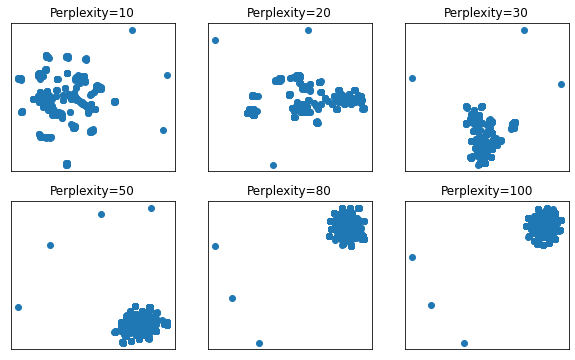

In [39]:
# Run t-SNE for different values of perplexity
perplexity_list = [10, 20, 30, 50, 80, 100]
fig, axs = plt.subplots(2,3, figsize=(10,6))
axs = axs.ravel()
for i, p in enumerate(perplexity_list):
    tsne = TSNE(n_components=2, perplexity=p)
    tsne_features = tsne.fit_transform(pca_data)
    axs[i].scatter(tsne_features[:,0], tsne_features[:,1])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f"Perplexity={p}")
plt.show()

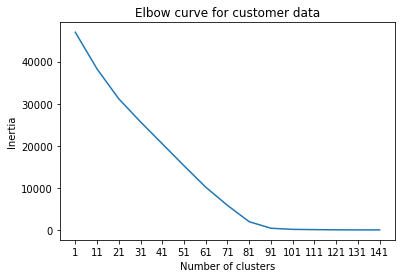

In [48]:
inertia = []
k_list = list(range(1, 150,10))

# Calculate the inertia for the range of k values
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(pca_data)
    inertia.append(km.inertia_)
    
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()